# importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import pydot

# to allow the code working on GPU instead CPU

In [2]:
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

IndexError: list index out of range

In [3]:
#load_dataset function to load the data and resize the images to 50x50
def load_dataset(directory):
  images = []
  labels = []
  for idx, label in enumerate(uniq_labels):
    for file in os.listdir(directory + '/'+label):
      filepath = directory +'/'+ label + "/" + file
      img = cv2.resize(cv2.imread(filepath),(50,50))
      images.append(img)
      labels.append(idx)
  images = np.asarray(images)
  labels = np.asarray(labels)
  return images, labels

In [4]:
#display_images function to show examples
def display_images(x_data, y_data, title, display_label = True):
    x, y = x_data, y_data
    fig, axes = plt.subplots(5, 8, figsize = (18, 5))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    fig.suptitle(title, fontsize = 18)
    for i, ax in enumerate(axes.flat):
        ax.imshow(cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB))
        if display_label:
            ax.set_xlabel(uniq_labels[y[i]])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [5]:
#loading_dataset into X_pre and Y_pre
data_dir = r'dataset'
uniq_labels = sorted(os.listdir(data_dir))
X_pre, Y_pre = load_dataset(data_dir)
print(X_pre.shape, Y_pre.shape)

(20000, 50, 50, 3) (20000,)


In [6]:
#spliting dataset into 80% train, 10% validation and 10% test data
X_train, X_test, Y_train, Y_test = train_test_split(X_pre, Y_pre, test_size = 0.2, shuffle = True)
X_test, X_eval, Y_test, Y_eval = train_test_split(X_test, Y_test, test_size = 0.5, shuffle = True)

In [7]:
%matplotlib notebook

In [8]:
%matplotlib inline

Train images shape (16000, 50, 50, 3) (16000,)
Test images shape (2000, 50, 50, 3) (2000,)
Evaluate image shape (2000, 50, 50, 3) (2000,)
Printing the labels ['Dislike', 'I Love You', 'Like', 'No', 'Yes'] 5


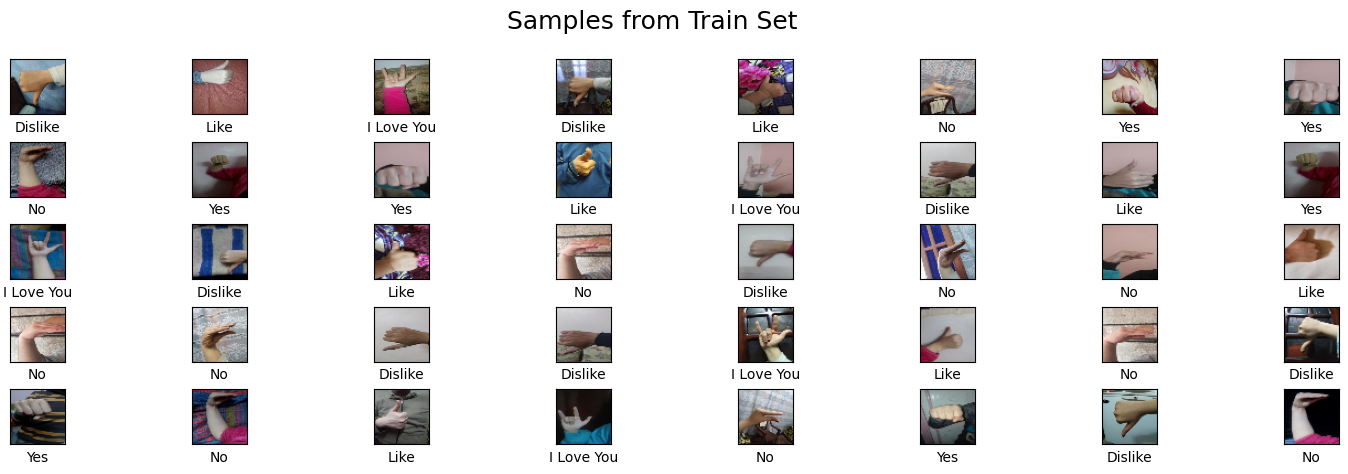

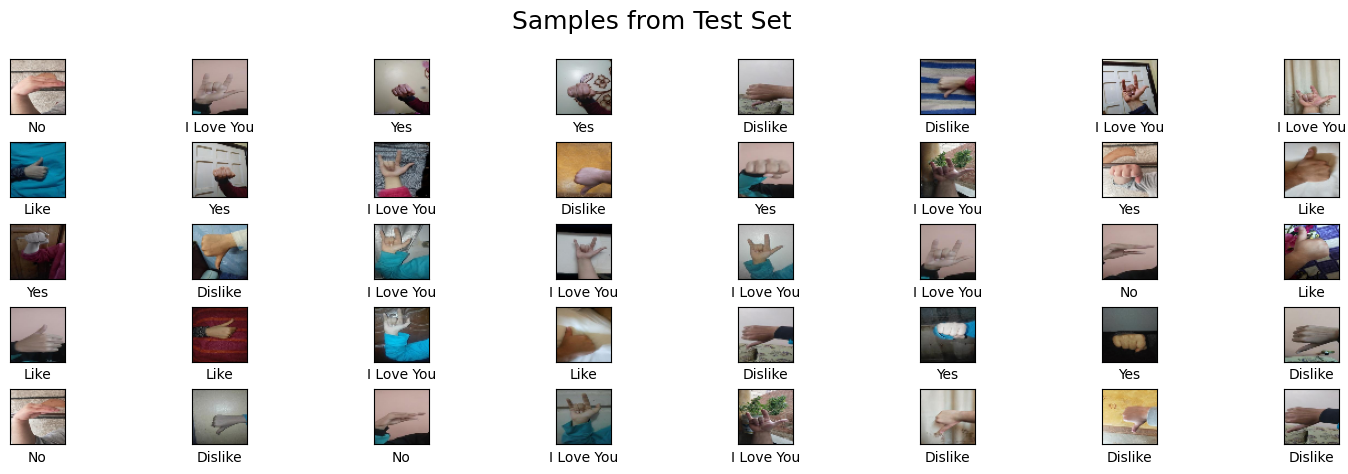

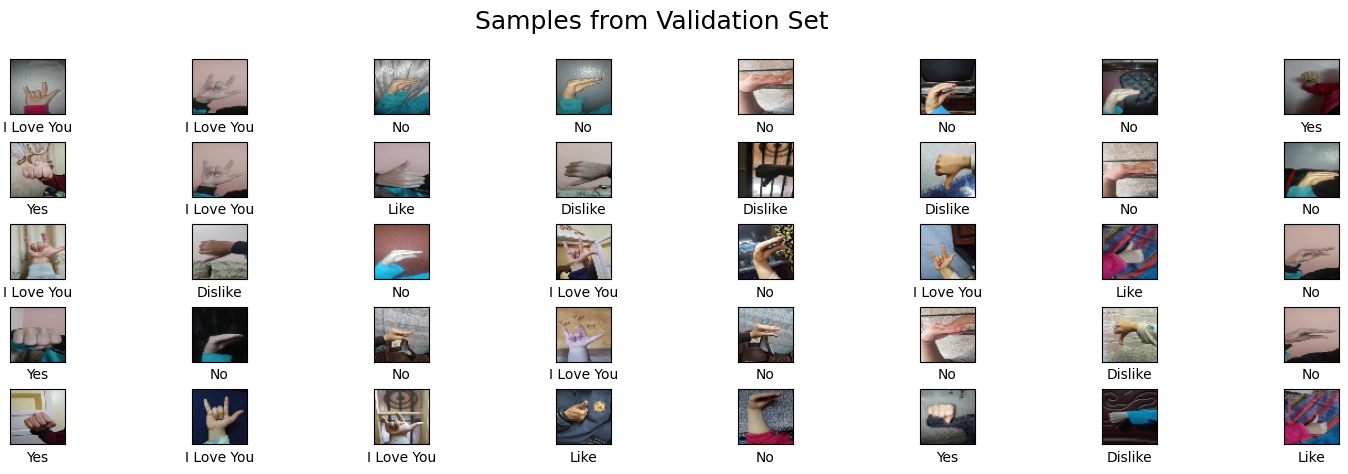

In [9]:
#print shapes and show examples for each set
print("Train images shape",X_train.shape, Y_train.shape)
print("Test images shape",X_test.shape, Y_test.shape)
print("Evaluate image shape",X_eval.shape, Y_eval.shape)
print("Printing the labels",uniq_labels, len(uniq_labels))
display_images(X_train,Y_train,'Samples from Train Set')
display_images(X_test,Y_test,'Samples from Test Set')
display_images(X_eval,Y_eval,'Samples from Validation Set')

In [10]:
# converting Y_tes and Y_train to One hot vectors using to_categorical
# example of one hot => '1' is represented as [0. 1. 0. . . . . 0.]
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_eval = to_categorical(Y_eval)
X_train = X_train / 255.
X_test = X_test / 255.
X_eval = X_eval / 255.

In [11]:
# building our model
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape=(50,50,3)),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

C:\Users\Electronica Care\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 44, 44, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 18, 18, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,117 (602.02 KB)

 Trainable params: 154,117 (602.02 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#compiling the model
#default batch size 32
#default learning rate is 0.001
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

In [13]:
#start training(fitting) the data
history = model.fit(X_train, Y_train, epochs=20, verbose=1,
                validation_data=(X_eval, Y_eval))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.4816 - loss: 1.2117 - val_accuracy: 0.8875 - val_loss: 0.3392
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9078 - loss: 0.2859 - val_accuracy: 0.9460 - val_loss: 0.1775
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9620 - loss: 0.1139 - val_accuracy: 0.9615 - val_loss: 0.1121
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9764 - loss: 0.0669 - val_accuracy: 0.9875 - val_loss: 0.0417
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9891 - loss: 0.0376 - val_accuracy: 0.9885 - val_loss: 0.0466
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9877 - loss: 0.0438 - val_accuracy: 0.9895 - val_loss: 0.0450
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9955 - loss: 0.0164 - val_accuracy: 0.9775 - val_loss: 0.0834
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9874 - loss: 0.0366 - 

In [14]:
#testing
model.evaluate(X_test, Y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9968 - loss: 0.0094


[0.009163103066384792, 0.996999979019165]

In [15]:
#save the model
model.save(r'model.h5')

In [16]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


In [17]:
%matplotlib inline

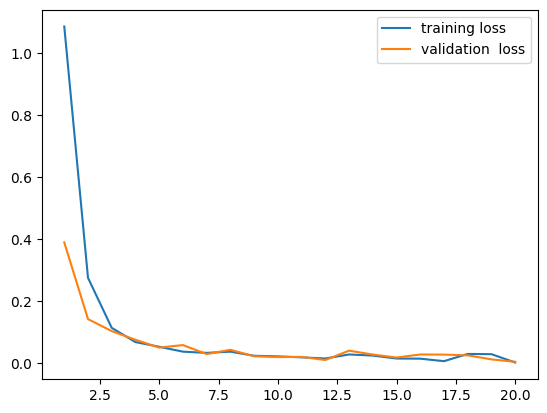

In [18]:
#ploting training and validation loss vs. epochs
#%matplotlib notebook
%matplotlib inline
epochs = list(range(1,21))
plt.plot(epochs, train_loss, label = "training loss")
plt.plot(epochs, val_loss, label = "validation  loss")
plt.legend()
plt.show()

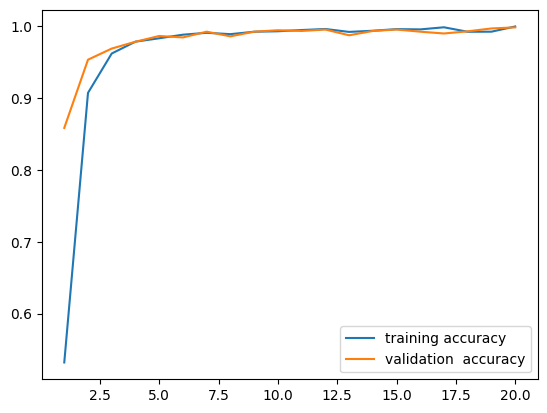

In [19]:
#ploting training and validation accuracy vs. epochs
#%matplotlib notebook
%matplotlib inline
plt.plot(epochs, train_acc, label = "training accuracy")
plt.plot(epochs, val_accuracy, label = "validation  accuracy")
plt.legend()
plt.show()